# Exercise 1: FEM in 1D

#### Exercise 1.1 - Derive the weighted average of the residual (the equations we solve numerically in the FEM method) by integrating by parts and expanding the solution using nodal basis functions.

##### Answer:

\begin{align}
    \tag{1}
- \frac{d}{dx} \left(\alpha \frac{d f}{d x} \right) + \beta f = s, \; a < x < b,
\end{align}

\begin{align}
\tag*{}
f(a) = f_a
\end{align}

\begin{equation}
\tag*{}
f(b) = f_b.
\end{equation}

We will use the finite element method to solve this problem. We will use linear elements, so the solution will be piecewise linear. We will use the Galerkin method to derive the weak form of the problem. We will use the following nodal basis functions:

\begin{equation}
\tag{2}
f(x) = \sum_{i=1}^{N+1} f_i \varphi_i(x).
\end{equation}

We know that to obtain the weighted average of the residuals we want to minimize the residual $r = L[f] - s$. To do this, we set a weighted average of the residual to zero

\begin{equation}
\tag{3}
\langle w_i, r \rangle = 0,
\end{equation}
where $r$ is
\begin{equation}
\tag{4}
r = - \frac{d}{dx} \left(\alpha \frac{d f}{d x} \right) + \beta f - s = L[f] -s,
\end{equation}

With this, we can develop Eq. (3) as follows:

\begin{equation}
\begin{split}
\tag{5}
\langle w_i, r \rangle &= \int_a^b w_i \left( - \frac{d}{dx} \left(\alpha \frac{d f}{d x} \right) + \beta f - s \right) dx = \\
&= \int_a^b \left(-w_i\frac{d}{dx}\alpha f' + w_i\beta f - w_is \right)dx = \\
&= [-w_i\alpha f']|^b_a + \int_a^b \left(w_i'\alpha f' + w_i\beta f - w_is \right)dx = \\
&= \int_a^b \left(w_i'\alpha f' + w_i\beta f - w_is \right)dx = 0, \quad i = 2, \ldots, N.
\end{split}
\end{equation}

The term $[-w_i\alpha f']|^b_a$ is zero because $w_i(a) = w_i(b) = 0$.

Now we can use the basis functions to write the equation (5) as

\begin{equation}
\tag{6}
\int_a^b \left(w_i'\alpha \sum_{j=1}^{N+1} f_j \varphi_j' + w_i\beta \sum_{j=1}^{N+1} f_j \varphi_j - w_i s \right)dx = 0, \quad i = 2, \ldots, N.
\end{equation}

Using Galerkin's method, this is, $w_i = \varphi_i$, and knowing that $f_1 = f(a)$ and $f_{N+1} = f(b)$, we can write the equation (6) as

\begin{equation}
\tag{7}
\int_a^b \left(\varphi_i'\alpha \sum_{j=1}^{N+1} f_j \varphi_j' + \varphi_i\beta \sum_{j=1}^{N+1} f_j \varphi_j - \varphi_i s \right)dx = 0, \quad i = 2, \ldots, N, \quad j = 2, \ldots, N.
\end{equation}
setting $j = 1$ and $j = N+1$ outside the sum so we can set this as a linear system with a square matrix.

Separating the terms in the equation (7), in a linear system $Az = b$, we have

\begin{equation}
\tag{8}
\begin{split} 
&A_{ij} = \int_a^b \left(\alpha\varphi_i'\varphi_j' + \beta\varphi_i\varphi_j \right)dx, \\
&z_j = f_j, \\
&b_i = \int_a^b \varphi_i s dx - (A_{i1}f_1 + A_{i,N+1}f_{N+1}).
\end{split}
\end{equation}
(We choose to write the system in this format because this gives us already a square matrix $A$.)

Writing the linear system like this is useful because we obtain a square matrix $A$ that is symmetric.

#### Exercise 1.2 -  Implement a code in Python to solve numerically the Helmholtz equation above with
-   alpha = 1 
-   beta = 1
-   a = 0
-   b = pi
-   s(x) = 10*sin(3*x)


In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:

##################### Configuration #####################
n = 30
h = np.pi / n

# Global stiffness matrix A and right-hand side vector b.
A = np.zeros((n-1, n-1)) 
b = np.zeros(n-1)

# alpha function
def alpha(x):
    return 1

# beta function
def beta(x):
    return 1

# source
def s(x):
    sin3x = np.sin(3 * x)
    sval = 9 * sin3x
    sval += sin3x
    return sval

##################### Setting the matrix A and vector b #####################
for i in range(1, n + 1):
    # Coordinates
    xim1 = (i - 1) * h
    xi = i * h

    # Points for 2-point Gauss quadrature
    pt1 = (xi + xim1) / 2 - h / (2 * np.sqrt(3))
    pt2 = (xi + xim1) / 2 + h / (2 * np.sqrt(3))

    # Form Stiffness matrix A
    pint = 0.5 * (alpha(pt1) + alpha(pt2)) * h
    qiint = 0.5 * (beta(pt1) * (pt1 - xim1) ** 2 + beta(pt2) * (pt2 - xim1) ** 2) * h
    qim1int = 0.5 * (beta(pt1) * (xi - pt1) ** 2 + beta(pt2) * (xi - pt2) ** 2) * h

    if i < n:
        A[i - 1, i - 1] += pint / h**2 + qiint / h**2

    if i > 1:
        A[i - 2, i - 2] += pint / h**2 + qim1int / h**2
        qiim1 = 0.5 * h * (beta(pt1) * (xi - pt1) * (pt1 - xim1) + beta(pt2) * (xi - pt2) * (pt2 - xim1))
        if i < n:
            A[i - 2, i - 1] = -pint / h**2 + qiim1 / h**2
            A[i - 1, i - 2] = A[i - 2, i - 1]

    # Right-hand side
    fiint = 0.5 * (s(pt1) * (pt1 - xim1) + s(pt2) * (pt2 - xim1)) * h
    fim1int = 0.5 * (s(pt1) * (xi - pt1) + s(pt2) * (xi - pt2)) * h
    if i < n:
        b[i - 1] += fiint / h
    if i > 1:
        b[i - 2] += fim1int / h

In [54]:
# Solve the linear system using the FEM method
f = np.linalg.solve(A, b)

In [55]:
# Analytical Solution
ftrue = np.zeros(n-1)  # Initialize the array for the analytical solution

for i in range(1, n):
    xi = i * h
    ftrue[i-1] = np.sin(3*xi)  # Analytical solution

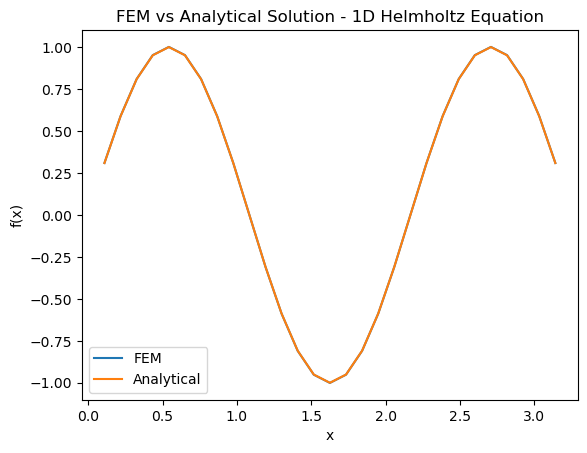

In [56]:
plt.plot(np.linspace(0, np.pi, n)[1:], f, label='FEM') # We skip the first node since we are only computing the solution at the interior nodes
plt.plot(np.linspace(0, np.pi, n)[1:], ftrue, label='Analytical')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('FEM vs Analytical Solution - 1D Helmholtz Equation')
plt.legend()
plt.show()


#### 1.2.3 Report and describe code to calculate the element of stiffness matrix, Aij, and source term elements bi. Where the derivative of the test/weight function is taken? How do you solve the linear system?

##### Answer:
To obtain the element of the stiffness matrix $A_{ij}$ and the source term elements $b_i$, we need to calculate the integrals in the equation (8). For that the 2-point Gauss quadrature is used. This is done in the for loop, where the objects needed to compute the linear system are set. The derivative of the test/weight function is implicitly taken in the object $\texttt{pint}$, but since we are using linear elements, the derivative is constant in each element. Finally, the linear system is solved using the $\texttt{solve}$ function from the $\texttt{numpy.linalg}$ library, that solves the linear system $Az = b$, returning the vector $z$ with the solution - in our case, $f(x)$.

#### 1.2.4 What is the sparsity of the stiffness matrix? Plot the sparsity. Is what you expected?

The sparsity of the stiffness matrix is caused by the fact that the basis functions that we are using, linear functions that are only different from zero on the coodinate of the node i, make the coupling being only between nearest neighbors, since we are in 1D. Therefore, we obtain a tridiagonal matix. This is what we expected, and the sparsity of the stiffness matrix is shown in the plot below.

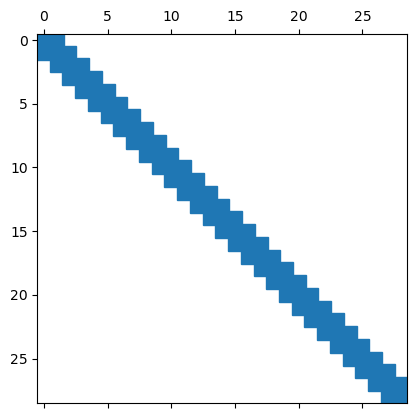

In [57]:
import scipy.sparse as sp

A_sps = sp.csr_matrix(A)
plt.spy(A_sps)
plt.show()

#### 1.2.5 Change the code to solve the Poisson equation d^2 Phi / dx^2 = - rho in 1D domain [0, pi]. the source term is rho = sin(2x) and Phi(0) = Phi(pi) = 0. Plot the solution of the potential using a different number of elements. It is not necessary to calculate the analytical solution for comparison.

In [58]:
##################### Configuration #####################
n = 30
h = np.pi / n

# Global stiffness matrix A and right-hand side vector b.
A = np.zeros((n-1, n-1)) 
b = np.zeros(n-1)

# alpha function
def alpha(x):
    return 1

# beta function
def beta(x):
    return 0

# source
def rho(x):
    return -np.sin(2*x)

##################### Setting the matrix A and vector b #####################
for i in range(1, n + 1):
    # Coordinates
    xim1 = (i - 1) * h
    xi = i * h

    # Points for 2-point Gauss quadrature
    pt1 = (xi + xim1) / 2 - h / (2 * np.sqrt(3))
    pt2 = (xi + xim1) / 2 + h / (2 * np.sqrt(3))

    # Form Stiffness matrix A
    pint = 0.5 * (alpha(pt1) + alpha(pt2)) * h

    if i < n:
        A[i - 1, i - 1] += pint / h**2 

    if i > 1:
        A[i - 2, i - 2] += pint / h**2 
        if i < n:
            A[i - 2, i - 1] = -pint / h**2
            A[i - 1, i - 2] = A[i - 2, i - 1]

    # Right-hand side
    fiint = -0.5 * (rho(pt1) * (pt1 - xim1) + rho(pt2) * (pt2 - xim1)) * h
    fim1int = -0.5 * (rho(pt1) * (xi - pt1) + rho(pt2) * (xi - pt2)) * h
    if i < n:
        b[i - 1] += fiint / h
    if i > 1:
        b[i - 2] += fim1int / h

In [59]:
phi_interior = np.linalg.solve(A, b)
phi_full = np.zeros(n+1)
phi_full[1:-1] = phi_interior

In [60]:
phi_true = np.zeros(n+1)  # Initialize the array for the analytical solution

for i in range(0, n+1):
    xi = i * h
    phi_true[i] = (1/4)*np.sin(2*xi)

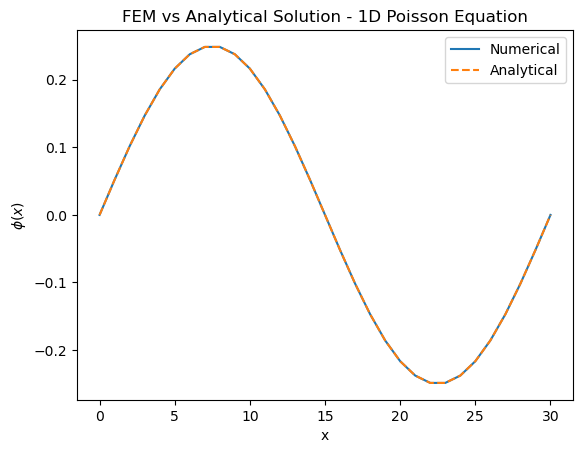

In [61]:
plt.plot(phi_full, label='Numerical')
plt.plot(phi_true, "--", label='Analytical')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM vs Analytical Solution - 1D Poisson Equation')
plt.legend()
plt.show()


In [62]:
def FEM_solution(n):
    ##################### Configuration #####################
    h = np.pi / n

    # Global stiffness matrix A and right-hand side vector b.
    A = np.zeros((n-1, n-1)) 
    b = np.zeros(n-1)

    # alpha function
    def alpha(x):
        return 1

    # beta function
    def beta(x):
        return 0

    # source
    def rho(x):
        return -np.sin(2*x)

    ##################### Setting the matrix A and vector b #####################
    for i in range(1, n + 1):
        # Coordinates
        xim1 = (i - 1) * h
        xi = i * h

        # Points for 2-point Gauss quadrature
        pt1 = (xi + xim1) / 2 - h / (2 * np.sqrt(3))
        pt2 = (xi + xim1) / 2 + h / (2 * np.sqrt(3))

        # Form Stiffness matrix A
        pint = 0.5 * (alpha(pt1) + alpha(pt2)) * h

        if i < n:
            A[i - 1, i - 1] += pint / h**2 

        if i > 1:
            A[i - 2, i - 2] += pint / h**2 
            if i < n:
                A[i - 2, i - 1] = -pint / h**2
                A[i - 1, i - 2] = A[i - 2, i - 1]

        # Right-hand side
        fiint = -0.5 * (rho(pt1) * (pt1 - xim1) + rho(pt2) * (pt2 - xim1)) * h
        fim1int = -0.5 * (rho(pt1) * (xi - pt1) + rho(pt2) * (xi - pt2)) * h
        if i < n:
            b[i - 1] += fiint / h
        if i > 1:
            b[i - 2] += fim1int / h
    
    return A, b

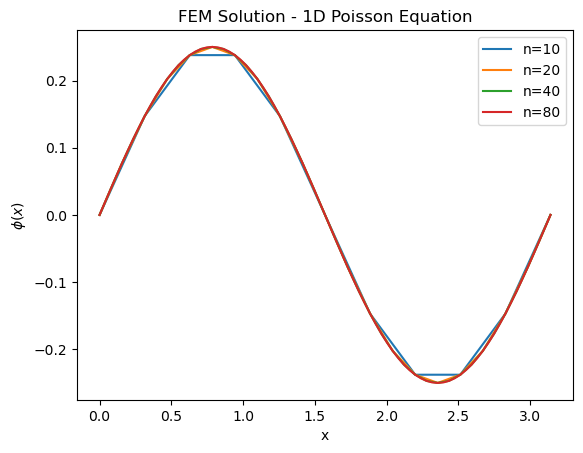

In [63]:
A_10, b_10 = FEM_solution(10)
phi_10 = np.linalg.solve(A_10, b_10)
phi_full_10 = np.zeros(11)
phi_full_10[1:-1] = phi_10

A_20, b_20 = FEM_solution(20)
phi_20 = np.linalg.solve(A_20, b_20)
phi_full_20 = np.zeros(21)
phi_full_20[1:-1] = phi_20

A_40, b_40 = FEM_solution(40)
phi_40 = np.linalg.solve(A_40, b_40)
phi_full_40 = np.zeros(41)
phi_full_40[1:-1] = phi_40

A_80, b_80 = FEM_solution(80)
phi_80 = np.linalg.solve(A_80, b_80)
phi_full_80 = np.zeros(81)
phi_full_80[1:-1] = phi_80

plt.plot(np.linspace(0, np.pi, 11), phi_full_10, label='n=10')
plt.plot(np.linspace(0, np.pi, 21), phi_full_20, label='n=20')
plt.plot(np.linspace(0, np.pi, 41), phi_full_40, label='n=40')
plt.plot(np.linspace(0, np.pi, 81), phi_full_80, label='n=80')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()
plt.show()


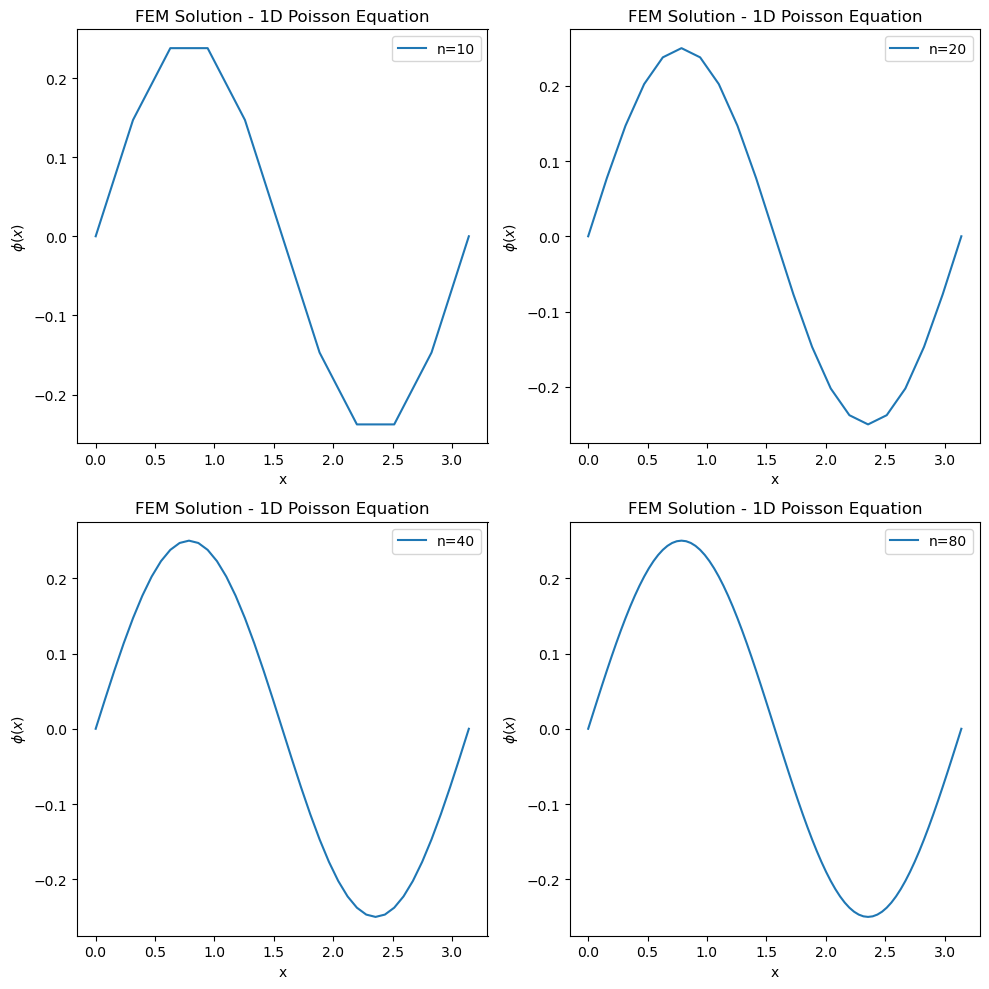

In [64]:
# Plotted separately for better visualization
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(np.linspace(0, np.pi, 11), phi_full_10, label='n=10')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(np.linspace(0, np.pi, 21), phi_full_20, label='n=20')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(np.linspace(0, np.pi, 41), phi_full_40, label='n=40')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(np.linspace(0, np.pi, 81), phi_full_80, label='n=80')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('FEM Solution - 1D Poisson Equation')
plt.legend()

plt.tight_layout()
plt.show()

To solve the Poisson equation we can use the same code but we have to change the source and take into account that for this case $\alpha = 1$ and $\beta = 0$.
From the plots above we can see that the solution obtained using the FEM method is very close to the analytical solution.
After that we plotted the solution for different number of elements, and we can see that the solution converges to the analytical solution as we increase the number of elements.

# Exercise 2 - MoM for Poisson in 1D

#### 2.1.1 Which basis function does the code use?
The code uses the piecewise linear basis function.

In [65]:
def MoM2D(xs, ys, xe, ye, V):
    # Observation points
    xobs = 0.5 * (xs + xe)
    yobs = 0.5 * (ys + ye)

    # Length of elements
    h = np.sqrt((xe - xs)**2 + (ye - ys)**2)

    # Initialize A matrix
    num_elements = len(xs)
    A = np.zeros((num_elements, num_elements))

    # Loop over elements
    for k in range(num_elements):
        s = ((xobs - xs[k]) * (xe[k] - xs[k]) + (yobs - ys[k]) * (ye[k] - ys[k])) / h[k]**2
        d = np.sqrt((xobs - xs[k])**2 + (yobs - ys[k])**2 - s**2 * h[k]**2 + 1e-10)
        xis = -s * h[k]
        xie = (1 - s) * h[k]

        temp = (0.5 * xie * np.log(xie**2 + d**2) - xie + d * np.arctan(xie / d) 
                - (0.5 * xis * np.log(xis**2 + d**2)- xis+ d * np.arctan(xis / d)))

        A[:, k] = -temp / (2 * np.pi * 8.854187)

    # Solve for charge density
    sigma = np.linalg.solve(A, V)

    # Calculate total charge on each element
    charge = h * sigma

    return charge, sigma

#### 2.1.2 Identify and report the Python/Matlab code that calculates the integral for a single element. Is the integral calculated analytically or numerically?
The integral is computed analytically in the snipped:

```
for k in range(num_elements):
        s = ((xobs - xs[k]) * (xe[k] - xs[k]) + (yobs - ys[k]) * (ye[k] - ys[k])) / h[k]**2
        d = np.sqrt((xobs - xs[k])**2 + (yobs - ys[k])**2 - s**2 * h[k]**2 + 1e-10)
        xis = -s * h[k]
        xie = (1 - s) * h[k]

        temp = (0.5 * xie * np.log(xie**2 + d**2) - xie + d * np.arctan(xie / d) 
                - (0.5 * xis * np.log(xis**2 + d**2)- xis+ d * np.arctan(xis / d)))
        
        A[:, k] = -temp / (2 * np.pi * 8.854187)
```

In [66]:
def Compute_C(n):
    # Define parameters
    a = 1  # Separation distance between capacitor plates
    w = 1  # Width of capacitor plates
    #n = 10  # Number of unknowns
    nh = n // 2  # Number of elements on each plate
    h = a / nh  # Length of the elements

    # X-coordinates for starting and ending points
    xs = np.zeros(n)
    xe = np.zeros(n)
    xs[:nh] = np.linspace(0, a - h, nh)
    xs[nh:] = np.linspace(0, a - h, nh)
    xe = xs + h

    # Y-coordinates for starting and ending points
    ys = np.zeros(n)
    ye = np.zeros(n)
    ys[:nh] = 0.5 * w
    ys[nh:] = -0.5 * w
    ye = ys

    # Potential for the elements
    V = np.zeros(n)
    V[:nh] = 0.5
    V[nh:] = -0.5

    # Solve the electrostatic problem
    charge, sigma = MoM2D(xs, ys, xe, ye, V)
    C = np.sum(charge[:nh])
    
    return C


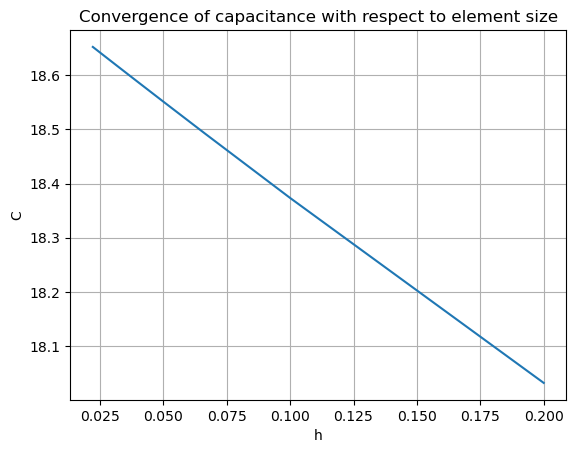

In [67]:
n = np.arange(10, 100, 10)
C = np.zeros(len(n))
for i in range(len(n)):
    C[i] = Compute_C(n[i])
nh = n // 2
h = 1 / nh
plt.plot(h, C)
plt.xlabel("h")
plt.ylabel("C")
plt.title("Convergence of capacitance with respect to element size")
plt.grid()
plt.show()

Capacitance for h = 0:  18.727469584173793


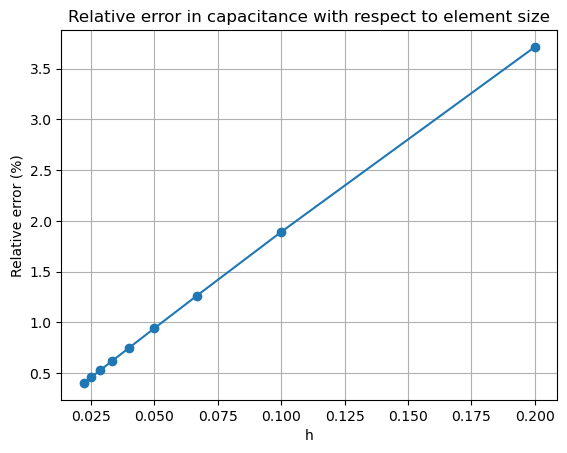

In [68]:
# Extrapolate to h = 0
p = np.polyfit(h, C, 1)
C0 = p[1]
print("Capacitance for h = 0: ", C0)

# Error in capacitance
error = np.abs(C-C0)/C0

plt.plot(h, error*100, "-o")
plt.xlabel("h")
plt.ylabel("Relative error (%)")
plt.title("Relative error in capacitance with respect to element size")
plt.grid()
plt.show()

#### 2.1.3 Perform and plot a convergence test of the method (calculate the Capacitance), increasing the number of elements. Compare your results with Figure 7.5 in the textbook. What is the accuracy of the method?
The plot of the convergence test is similar to figure 7.5 in the book. Extrapolating the value of the capacitance for $h\rightarrow 0$ we get $C = 18.72746958417379$, and using this value as a reference we can calculate the error of the method to be of the order of 1e-2. The error increases linearly with the number of elements.

To obtain a relative error of about 1% we need to have around 60 elements.

#### 2.1.4 Plot the charge density distribution for the top capacitor against the x-coordinate with 20 and 200 elements. What is the difference in the value of the first (or last) element in the two cases? Why is there such a difference 

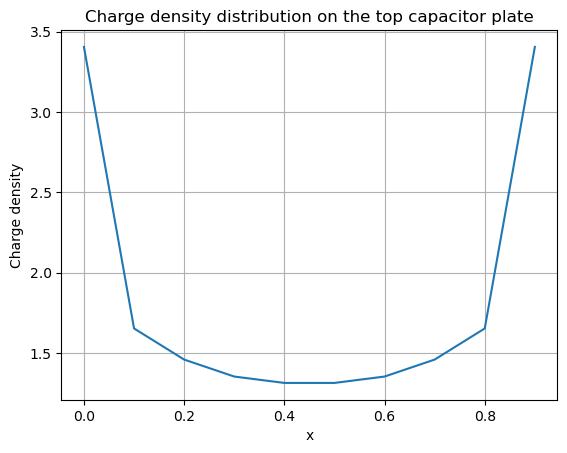

In [69]:
# Plot the charge density distribution for the top capacitor plate 
n = 20
nh = n // 2
h = 1 / nh
a = 1
w = 1
xs = np.zeros(n)
xe = np.zeros(n)
xs[:nh] = np.linspace(0, a - h, nh)
xs[nh:] = np.linspace(0, a - h, nh)
xe = xs + h

ys = np.zeros(n)
ye = np.zeros(n)
ys[:nh] = 0.5 * w
ys[nh:] = -0.5 * w
ye = ys

V = np.zeros(n)
V[:nh] = 0.5
V[nh:] = -0.5

charge, sigma = MoM2D(xs, ys, xe, ye, V)
plt.plot(xs[:nh], charge[:nh])
plt.xlabel("x")
plt.ylabel("Charge density")
plt.title("Charge density distribution on the top capacitor plate")
plt.grid()
plt.show()


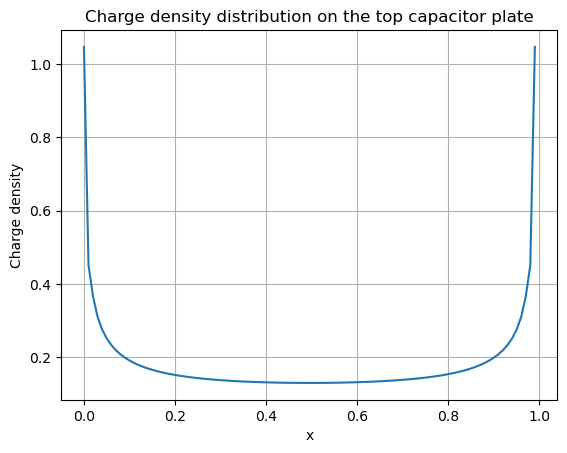

In [70]:
n = 200
nh = n // 2
h = 1 / nh
a = 1
w = 1
xs = np.zeros(n)
xe = np.zeros(n)
xs[:nh] = np.linspace(0, a - h, nh)
xs[nh:] = np.linspace(0, a - h, nh)
xe = xs + h

ys = np.zeros(n)
ye = np.zeros(n)
ys[:nh] = 0.5 * w
ys[nh:] = -0.5 * w
ye = ys

V = np.zeros(n)
V[:nh] = 0.5
V[nh:] = -0.5

charge, sigma = MoM2D(xs, ys, xe, ye, V)
plt.plot(xs[:nh], charge[:nh])
plt.xlabel("x")
plt.ylabel("Charge density")
plt.title("Charge density distribution on the top capacitor plate")
plt.grid()
plt.show()

There appears to be a tendency for the charge density to approach infinity as we reduce h. The course book analyses this in more depth, based on the boundary conditions used in the MoM simulation. The reason for this being mentioned in the course book: 
“Thus, the field components tend to infinity at the corner if $\alpha>\pi$. For the edge of the capacitor plate we have $\alpha=2\pi$ so that $E_\theta \propto r^{-1/2}$. This implies that the charge density on the plate varies as $r^{-1/2}$ near the edge.“

Since the corner in the simulation has an infinitely small radius for infinitely small values of h, the charge density goes to infinity as h is reduced. 


# Bonus Exercise II - Charged Particle Trajectories in Earth's Dipole

In [71]:
from scipy.integrate import solve_ivp
from scipy.constants import e, m_e, m_p, c

B0 = 3.07e-5  # Tesla
Re = 6378137  # meter (Earth radius)

# choose if electron if proton
m = m_p

The dipole model of the Earth's magnetic field is given by
\begin{equation}
\begin{split}
\tag{9}
B_r = -2B_0 \frac{R^3}{r^3} \cos(\theta), \\
B_{\theta} = -B_0 \frac{R^3}{r^3} \sin(\theta), \\
|B| = B_0 \frac{R^3}{r^3}\sqrt{1 + 3\cos^2(\theta)}, \\
r = \sqrt{x^2 + y^2 + z^2}, \\
cos(\theta) = \frac{z}{r}, \\
\sin(\theta) = \frac{\sqrt{x^2 + y^2}}{r}, \\
\end{split}
\end{equation}

In our case we have the momentum equation:
\begin{equation}
\tag{10}
m \frac{d^2 \vec{x}}{dt^2} = q(\vec{v} \times \vec{B}),
\end{equation}
where $\vec{v} = \frac{d\vec{x}}{dt}$ is the velocity of the particle, $q$ is the charge of the particle, $m$ is the mass of the particle, and $B$ is the magnetic field. We can write the equation (10) as a system of first order differential equations:

In [72]:
def lorentz(t, x_vect):
    
    x, y, z, ux, uy, uz = x_vect

    # Magnetic field components
    B = -B0 * Re**3 / (x**2 + y**2 + z**2)**2.5
    Bx = 3 * x * z * B
    By = 3 * y * z * B
    Bz = (2 * z**2 - x**2 - y**2) * B

    # Charge-to-mass ratio
    qom = e / m

    # Derivatives
    dxdt = ux
    dydt = uy
    dzdt = uz
    duxdt = qom * (uy * Bz - uz * By)
    duydt = qom * (uz * Bx - ux * Bz)
    duzdt = qom * (ux * By - uy * Bx)

    return [dxdt, dydt, dzdt, duxdt, duydt, duzdt]

In [73]:
K = 1e7 * e  # Kinetic energy in Joules
v_mod = c / np.sqrt(1 + (m * c**2) / K)  # Speed

# Initial position: equatorial plane 4Re from Earth
x0 = 4 * Re
y0 = 0
z0 = 0

# Initial velocity
pitch_angle_30 = 30.0  # degrees
ux0_30 = 0.0
uy0_30 = v_mod * np.sin(np.radians(pitch_angle_30))
uz0_30 = v_mod * np.cos(np.radians(pitch_angle_30))
# Initial velocity
pitch_angle_60 = 60.0  # degrees
ux0_60 = 0.0
uy0_60 = v_mod * np.sin(np.radians(pitch_angle_60))
uz0_60 = v_mod * np.cos(np.radians(pitch_angle_60))
# Initial velocity
pitch_angle_90 = 90.0  # degrees
ux0_90 = 0.0
uy0_90 = v_mod * np.sin(np.radians(pitch_angle_90))
uz0_90 = v_mod * np.cos(np.radians(pitch_angle_90))

# Initial conditions
initial_conditions_30 = [x0, y0, z0, ux0_30, uy0_30, uz0_30]
initial_conditions_60 = [x0, y0, z0, ux0_60, uy0_60, uz0_60]
initial_conditions_90 = [x0, y0, z0, ux0_90, uy0_90, uz0_90]

# Time span
tfin = 80  # Final time in seconds
time = np.arange(0, tfin, 0.01)  # Time array

# Solve the ODE
solution_30 = solve_ivp(lorentz, [0, tfin], initial_conditions_30, t_eval=time, method='RK45')
solution_60 = solve_ivp(lorentz, [0, tfin], initial_conditions_60, t_eval=time, method='RK45')
solution_90 = solve_ivp(lorentz, [0, tfin], initial_conditions_90, t_eval=time, method='RK45')

# Extract the solution
x_sol_30 = solution_30.y.T  
x_sol_60 = solution_60.y.T  
x_sol_90 = solution_90.y.T

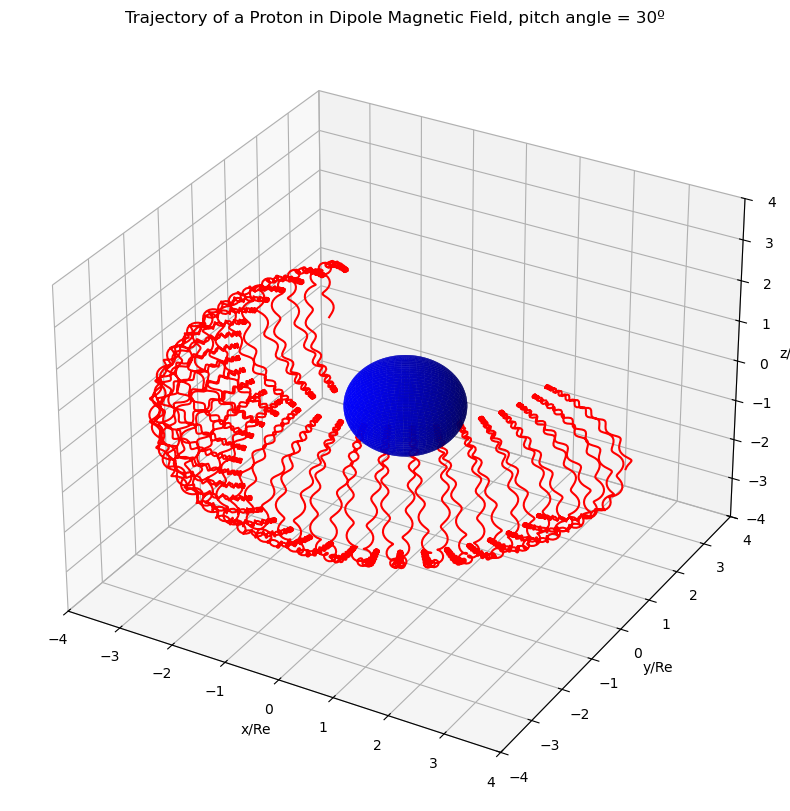

In [74]:
# Plotting the trajectory
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_sol_30[:, 0] / Re, x_sol_30[:, 1] / Re, x_sol_30[:, 2] / Re, 'r')

# Add a sphere at the center
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.9)


ax.set_xlabel('x/Re')
ax.set_ylabel('y/Re')
ax.set_zlabel('z/Re')
ax.set_title('Trajectory of a Proton in Dipole Magnetic Field, pitch angle = 30º')

# Set axis limits
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

plt.show()

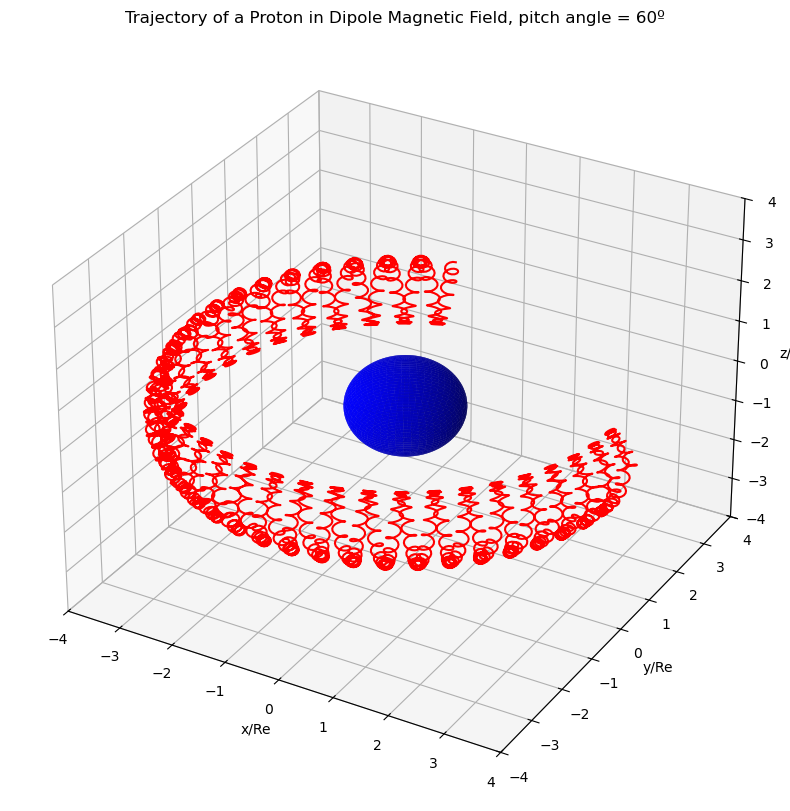

In [75]:
# Plotting the trajectory
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_sol_60[:, 0] / Re, x_sol_60[:, 1] / Re, x_sol_60[:, 2] / Re, 'r')

# Add a sphere at the center
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.9)


ax.set_xlabel('x/Re')
ax.set_ylabel('y/Re')
ax.set_zlabel('z/Re')
ax.set_title('Trajectory of a Proton in Dipole Magnetic Field, pitch angle = 60º')

# Set axis limits
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

plt.show()

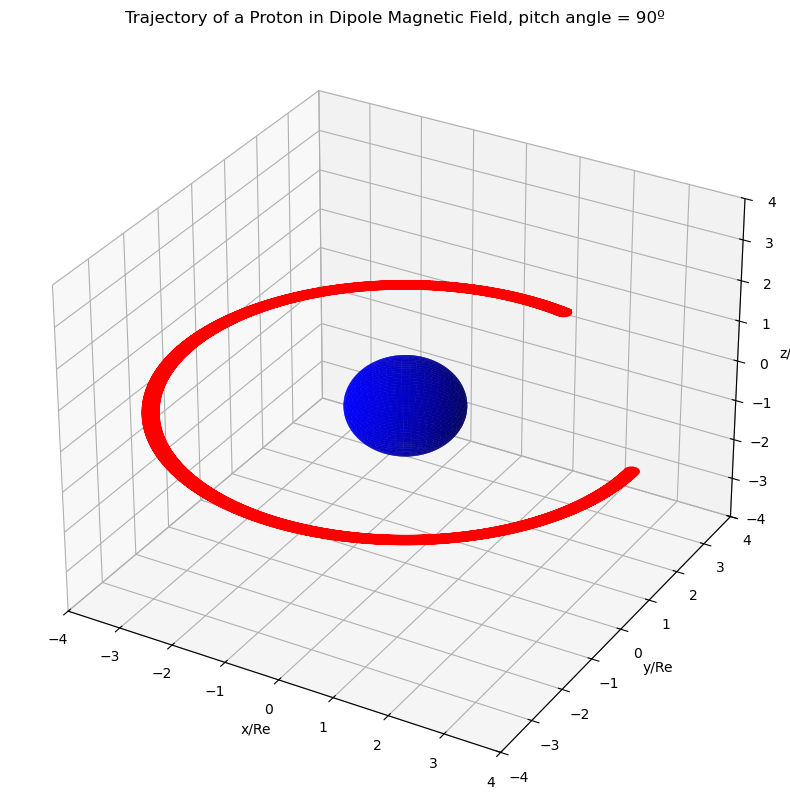

In [76]:
# Plotting the trajectory
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_sol_90[:, 0] / Re, x_sol_90[:, 1] / Re, x_sol_90[:, 2] / Re, 'r')

# Add a sphere at the center
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.9)


ax.set_xlabel('x/Re')
ax.set_ylabel('y/Re')
ax.set_zlabel('z/Re')
ax.set_title('Trajectory of a Proton in Dipole Magnetic Field, pitch angle = 90º')

# Set axis limits
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

plt.show()

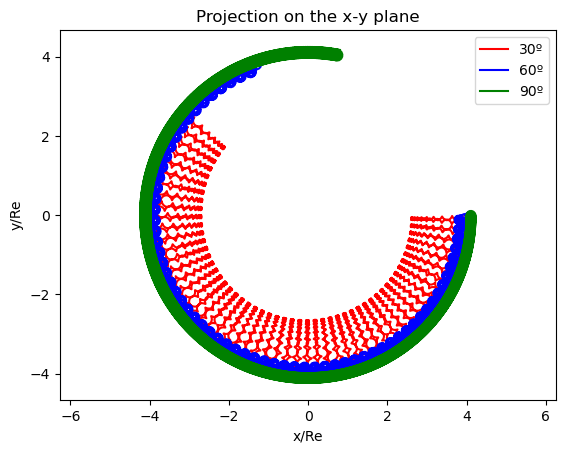

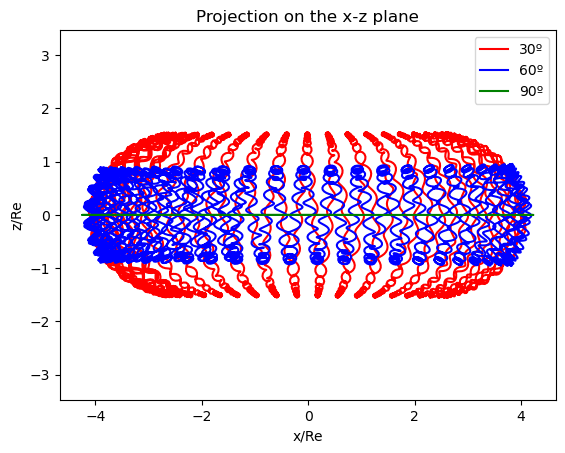

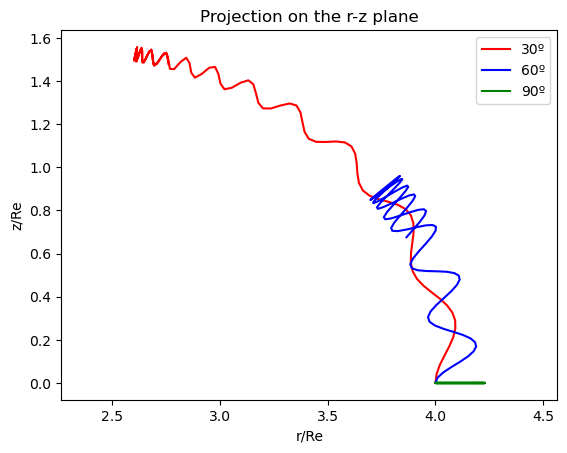

In [77]:
# plot the projection on the x-y plane
plt.plot(x_sol_30[:, 0] / Re, x_sol_30[:, 1] / Re, 'r', label='30º')
plt.plot(x_sol_60[:, 0] / Re, x_sol_60[:, 1] / Re, 'b', label='60º')
plt.plot(x_sol_90[:, 0] / Re, x_sol_90[:, 1] / Re, 'g', label='90º')
plt.xlabel('x/Re')
plt.ylabel('y/Re')
plt.title('Projection on the x-y plane')
plt.axis('equal')
plt.legend()
plt.show()

# plot the projection on the x-z plane
plt.plot(x_sol_30[:, 0] / Re, x_sol_30[:, 2] / Re, 'r', label='30º')
plt.plot(x_sol_60[:, 0] / Re, x_sol_60[:, 2] / Re, 'b', label='60º')
plt.plot(x_sol_90[:, 0] / Re, x_sol_90[:, 2] / Re, 'g', label='90º')
plt.xlabel('x/Re')
plt.ylabel('z/Re')
plt.title('Projection on the x-z plane')
plt.axis('equal')
plt.legend()    
plt.show()

# plot the projection on the r-z plane
r_30 = np.sqrt(x_sol_30[:100, 0]**2 + x_sol_30[:100, 1]**2)
plt.plot(r_30 / Re, x_sol_30[:100, 2] / Re, 'r', label='30º')
r_60 = np.sqrt(x_sol_60[:100, 0]**2 + x_sol_60[:100, 1]**2)
plt.plot(r_60 / Re, x_sol_60[:100, 2] / Re, 'b', label='60º')
r_90 = np.sqrt(x_sol_90[:100, 0]**2 + x_sol_90[:100, 1]**2)
plt.plot(r_90 / Re, x_sol_90[:100, 2] / Re, 'g', label='90º')
plt.xlabel('r/Re')
plt.ylabel('z/Re')
plt.title('Projection on the r-z plane')
plt.axis('equal')
plt.legend()
plt.show()



#### TB2.1 Pick one of the two approaches (full Lorentz force model or the guiding center approximation) and simulate the trajectory of a charged particle. Visualize the results to understand the particle's motion in the magnetic field. Compare the motion for two pitch angles, 30º, 60º and 90º and describe how they differ.

For the pitch angle of 30º we observe that the particle is trapped in the magnetic field and oscillates around the magnetic field lines, as well as for pitch angle of 60º, but with a larger amplitude, because for 30º the component of the velocity perpendicular to the magnetic field is smaller than for 60º.
For the pitch angle of 90º we observe that the particle is trapped in the magnetic field but since there is no component of the velocity parallel to the magnetic field, the amplitude of the oscilation from one pole to the other is zero, the particle moves in circles aroud the field line, in the plane perpendicular to the magnetic field.

#### TB2.2. Simulate electron trajectory (instead of proton as in the lectures and in the previous exercise) and visualize under different initial conditions (Energies, pitch angles, ...) and visualize the results. Answer the questions:
- What happens to the trajectory?
- What is the difference in motion compared to the proton?

For the case of the electrons, since their mass is much smaller than the proton mass, the electrons have a much larger gyroradius than the protons, and therefore the electrons move in much larger circles than the protons. This also makes the electrons have a much larger velocity than the protons for the same kinetic energy.

For thar purpose we can decrease the kinetic energy, to not have the eletrons moving at velocities close to c.

In [78]:
def lorentz(t, x_vect):
    
    x, y, z, ux, uy, uz = x_vect

    # Magnetic field components
    B = -B0 * Re**3 / (x**2 + y**2 + z**2)**2.5
    Bx = 3 * x * z * B
    By = 3 * y * z * B
    Bz = (2 * z**2 - x**2 - y**2) * B

    # Charge-to-mass ratio
    qom = -e / m_e

    # Derivatives
    dxdt = ux
    dydt = uy
    dzdt = uz
    duxdt = qom * (uy * Bz - uz * By)
    duydt = qom * (uz * Bx - ux * Bz)
    duzdt = qom * (ux * By - uy * Bx)

    return [dxdt, dydt, dzdt, duxdt, duydt, duzdt]

In [79]:
qom = -e / m_e
print(qom)

-175882000837.79984


In [80]:
K = 1e10 * e  # Kinetic energy in Joules
v_mod= c / np.sqrt(1 + (m_e * c**2) / K)  # Speed
print(v_mod)

299784798.611971


In [81]:
# Initial position: equatorial plane 4Re from Earth
x0 = 4 * Re
y0 = 0
z0 = 0

# Initial velocity
pitch_angle = 60.0  # degrees
ux0 = 0.0
uy0 = v_mod * np.sin(np.radians(pitch_angle))
uz0 = v_mod * np.cos(np.radians(pitch_angle))

# Initial conditions
initial_conditions = [x0, y0, z0, ux0, uy0, uz0]

# Time span
tfin = 0.7  # Final time in seconds
time = np.arange(0, tfin, 0.001)  # Time array

# Solve the ODE
solution = solve_ivp(lorentz, [0, tfin], initial_conditions, t_eval=time, method='RK45')

# Extract the solution
x_sol = solution.y.T  

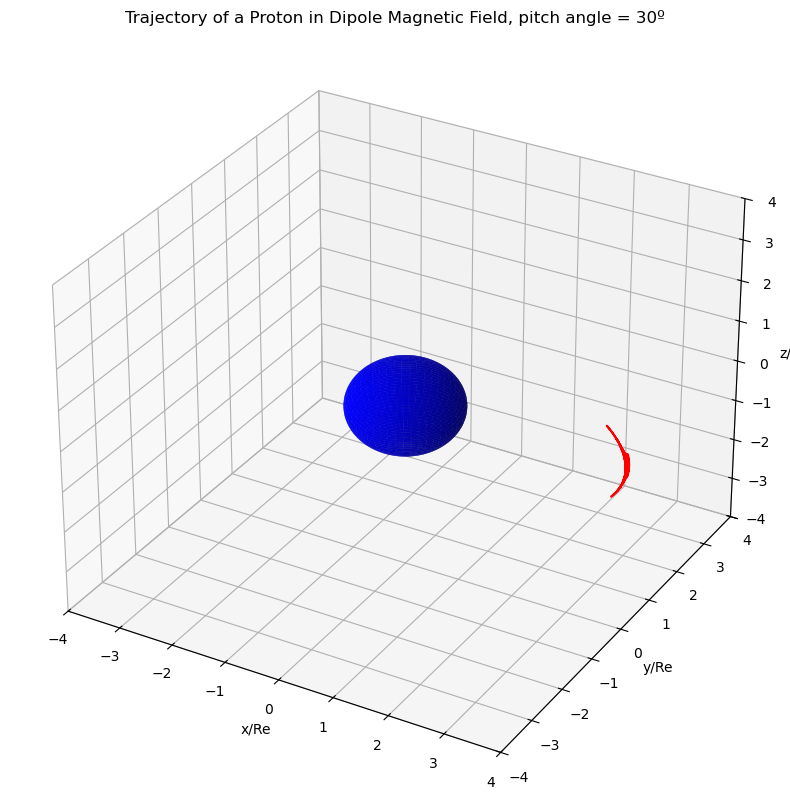

In [82]:
# Plotting the trajectory
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_sol[:, 0] / Re, x_sol[:, 1] / Re, x_sol[:, 2] / Re, 'r')

# Add a sphere at the center
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.9)


ax.set_xlabel('x/Re')
ax.set_ylabel('y/Re')
ax.set_zlabel('z/Re')
ax.set_title('Trajectory of a Proton in Dipole Magnetic Field, pitch angle = 30º')

# Set axis limits
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

plt.show()

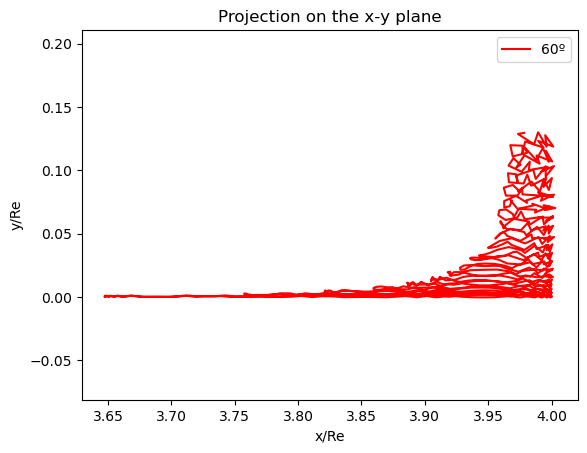

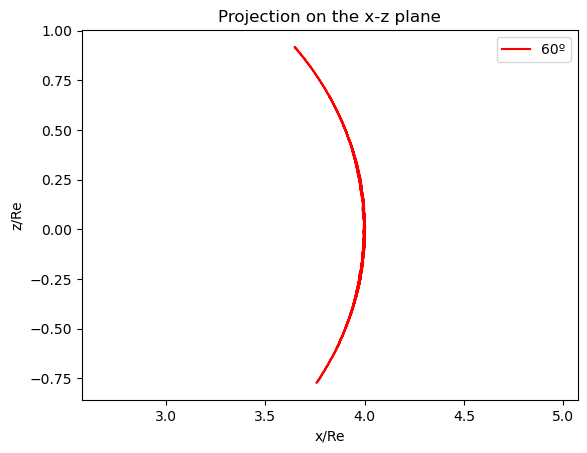

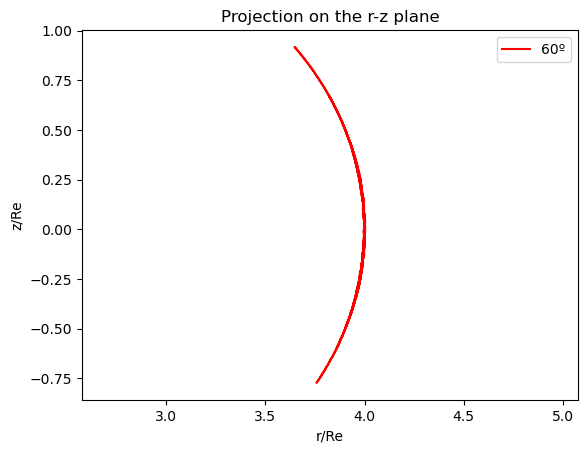

In [83]:
# plot the projection on the x-y plane
plt.plot(x_sol[:, 0] / Re, x_sol[:, 1] / Re, 'r', label='60º')
plt.xlabel('x/Re')
plt.ylabel('y/Re')
plt.title('Projection on the x-y plane')
plt.axis('equal')
plt.legend()
plt.show()

# plot the projection on the x-z plane
plt.plot(x_sol[:, 0] / Re, x_sol[:, 2] / Re, 'r', label='60º')
plt.xlabel('x/Re')
plt.ylabel('z/Re')
plt.title('Projection on the x-z plane')
plt.axis('equal')
plt.legend()    
plt.show()

# plot the projection on the r-z plane
r = np.sqrt(x_sol[:, 0]**2 + x_sol[:, 1]**2)
plt.plot(r / Re, x_sol[:, 2] / Re, 'r', label='60º')
plt.xlabel('r/Re')
plt.ylabel('z/Re')
plt.title('Projection on the r-z plane')
plt.axis('equal')
plt.legend()
plt.show()



For the electron, since it's mass is so small we can see that the integration diverges and we cannot obtain a stable solution using SI units. For electrons since their velocity is much larger, we expect that the integration will diverge faster than for protons, and also a smaller gyroradius, even after reducing the kinetic energy and the time of the simulation.

# Bonus Exercise I - FEM2D for Poisson Equation with FEniCS 

In [84]:
import gmsh
import pyvista
import dolfinx
from petsc4py.PETSc import ScalarType 
from dolfinx.fem.petsc import LinearProblem
from mpi4py import MPI
import basix
import ufl


**B1.1 State and give a brief description of the basic steps for solving the Poisson equation using the FEM**




*   We define the equation (Poisson)
*   We define the boundary conditions
*   We decide on basis and test functions to use
*   The equation and boundary conditions are reformulated into a weak form
*   The weak form is discretised onto the mesh, represented by a combination of basis functions
*   We construct a linear system of equations from the above, applying the boundary conditions
*   Then, we can solve the linear system

**B1.2 What are the element and the assembly matrices? What is the relation between the element and assembly matrices?**

The element matrix is a matrix representing a single element, being constructed from a set of nodes. The assembly matrix is constructed from the element matrixes.

**B1.3 Use either a modified version of the code from the slides or some of the other tools shown during the lecture to create a suiting mesh.**

**B1.3.2 What are two data structures used for storing information about the mesh? What are the numbers of elements and nodes in the mesh? How is it found? HINT: study mesh.geometry.**
The two data structures used to represent the matrix are the el2no and no2xy matrices. The former represents each element as a sequence of nodes. The latter stores information about the x and y coordinates for each node.





**B1.3.3 Formulate and solve the problem with FEniCSx, by following the the code examples in the lecture.**

The solution is below:

In [85]:
gmsh.initialize()
model = gmsh.model()
print(MPI.COMM_WORLD)
mesh_comm = MPI.COMM_WORLD
model_rank = 0
srfc = 6
if mesh_comm.rank == model_rank:
  square = model.occ.addRectangle(0,0,0,1,1)
  # square = model.occ.addDisk(0, 0, 0, 1, 1)

  circle = model.occ.addDisk(0, 0, 0, 0.5, 0.5)
  model_dim_tags = model.occ.cut([(2, square)],[(2, circle)])

  target_geometry = model_dim_tags[0][0]
  model.occ.synchronize()
  model.addPhysicalGroup(2, [square])
  #print(model_dim_tags)
  #model.add_physical_group(2, [square])
  model.mesh.generate(2)

  # Problem line
  #msh, mt, ft
  msh, cell_tags, facet_tags = dolfinx.io.gmshio.model_to_mesh(model, mesh_comm, model_rank)
  print(msh)
gmsh.finalize()


Info    : Meshing 1D...                                                                                      
Info    : [  0%] Meshing curve 1 (Ellipse)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 70%] Meshing curve 4 (Line)
Info    : [ 90%] Meshing curve 5 (Line)
Info    : Done meshing 1D (Wall 0.000156416s, CPU 0.000167s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00113575s, CPU 0.001115s)
Info    : 81 nodes 165 elements


In [86]:
# Define function space

dx = ufl.Measure("dx", domain=msh)

P1 = basix.ufl.element("Lagrange", msh.basix_cell(), 1)
W = dolfinx.fem.functionspace(msh, P1)

def f(x):
    return np.isclose(x[0], 0.0) | np.isclose(x[0], 1.0) | np.isclose(x[1], 0.0)

f_h = dolfinx.fem.Function(W)
f_h.interpolate(f)

def outer_box(x): 
    return np.isclose(x[0], 0.0)+np.isclose(x[0], 1.0)+np.isclose(x[1], 0.0)+np.isclose(x[1], 1.0) 

# def outer_circle(x):
#     return np.isclose(np.sqrt(x[0]**2 + x[1]**2), 1.0)

dim_surface = (msh.topology.dim - 1)
facets0 = dolfinx.mesh.locate_entities_boundary(msh, dim=dim_surface, marker=outer_box)
dofs = dolfinx.fem.locate_dofs_topological(V=W, entity_dim=dim_surface, entities=facets0)
bc0 = dolfinx.fem.dirichletbc(ScalarType(0), dofs, W)

# inner circle boundary condition
def inner_circle(x):
    return np.isclose(np.sqrt(x[0]**2 + x[1]**2), 0.5)

facets1 = dolfinx.mesh.locate_entities_boundary(msh, dim=dim_surface, marker=inner_circle)
dofs = dolfinx.fem.locate_dofs_topological(V=W, entity_dim=dim_surface, entities=facets1)
bc1 = dolfinx.fem.dirichletbc(1.0, dofs, W)

bcs = [bc0, bc1]

# Define variational problem
u = ufl.TrialFunction(W)
v = ufl.TestFunction(W)
a = ufl.inner(ufl.grad(u), ufl.grad(v)) * dx
L = ufl.inner(f_h, v) * dx

problem = LinearProblem(a, L, bcs=bcs, petsc_options={"ksp_type": "preonly", "pc_type": "lu"})

uh = problem.solve()

**B1.3.4 Use either Pyvista or Paraview to visualize the solution**

Using Pyvista:

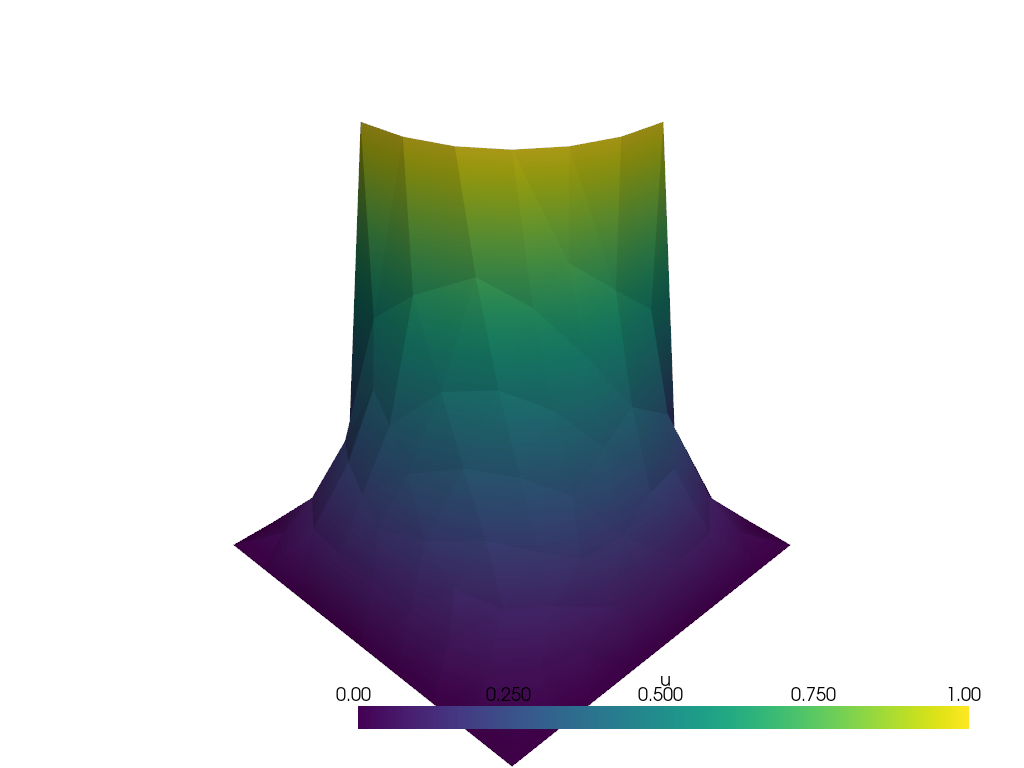

In [87]:
cells, types, x = dolfinx.plot.vtk_mesh(W)
grid = pyvista.UnstructuredGrid(cells, types, x)
grid.point_data["u"] = uh.x.array.real
grid.set_active_scalars("u")
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True)
warped = grid.warp_by_scalar()
plotter.add_mesh(warped)
plotter.show()

**B1.3.5 Measure the error of the FEM code using the capacitance result: you can take the finite difference high-resolution capacitance result and compare it with the FEM capacitance result. What is the Finite-Difference resolution that gives an error that is comparable to the FEM error**

In [88]:
bb_tree = dolfinx.geometry.bb_tree(msh, msh.geometry.dim-1)
x0 = np.array([[0.9, 0.9, 0]], dtype=np.float64)
cell_candidates = dolfinx.geometry.compute_collisions_points(bb_tree, x0)
cell = dolfinx.geometry.compute_colliding_cells(msh, cell_candidates, x0).array
uh.eval(x0, cell)

error = np.abs(uh.eval(x0, cell) - 0)
print(error)

[0.02053687]


To obtain this error using the FD method, we would need a step of $h\approx0.00175$, comparing with the results previosly obtained.